In [1]:
import pandas as pd 
import numpy as np 

In [2]:
holidays = pd.read_csv('favorita-grocery-sales-forecasting/holidays_events.csv')
items = pd.read_csv('favorita-grocery-sales-forecasting/items.csv')
oil = pd.read_csv('favorita-grocery-sales-forecasting/oil.csv')
stores = pd.read_csv('favorita-grocery-sales-forecasting/stores.csv')
train = pd.read_csv('favorita-grocery-sales-forecasting/train.csv')
test = pd.read_csv('favorita-grocery-sales-forecasting/test.csv')

/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_33352/2319485345.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('favorita-grocery-sales-forecasting/train.csv')


In [3]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [4]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [5]:
train = train.merge(items, on="item_nbr", how="left")

In [6]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [7]:
oil = oil.bfill()

In [8]:
train = train.merge(oil, on="date", how="left")

In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
train = train.merge(stores, on="store_nbr", how="left")

In [11]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,93.14,Salinas,Santa Elena,D,1
1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1
2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1
3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0,93.14,Salinas,Santa Elena,D,1
4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1,93.14,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,47.57,El Carmen,Manabi,C,3
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,47.57,El Carmen,Manabi,C,3
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,47.57,El Carmen,Manabi,C,3
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,47.57,El Carmen,Manabi,C,3


In [12]:
promotion_mode = train['onpromotion'].mode()[0]

In [13]:
train.fillna(promotion_mode,inplace=True)

/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_33352/3638277662.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.fillna(promotion_mode,inplace=True)
/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_33352/3638277662.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.fillna(promotion_mode,inplace=True)


Store Data

In [14]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
print("No of cities which have the stores: ",len(stores['city'].unique()))
print("No of states that contian stores: ",len(stores['state'].unique()))
print("No of clusters in the dataset",len(stores['cluster'].unique()))

No of cities which have the stores:  22
No of states that contian stores:  16
No of clusters in the dataset 17


In [16]:
stores['city'].value_counts()

city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: count, dtype: int64

In [17]:
stores['state'].value_counts()

state
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: count, dtype: int64

In [18]:
len(stores['state'].unique())

16

In [19]:
city_state_counts = stores.groupby(["state", "city"]).size().unstack()

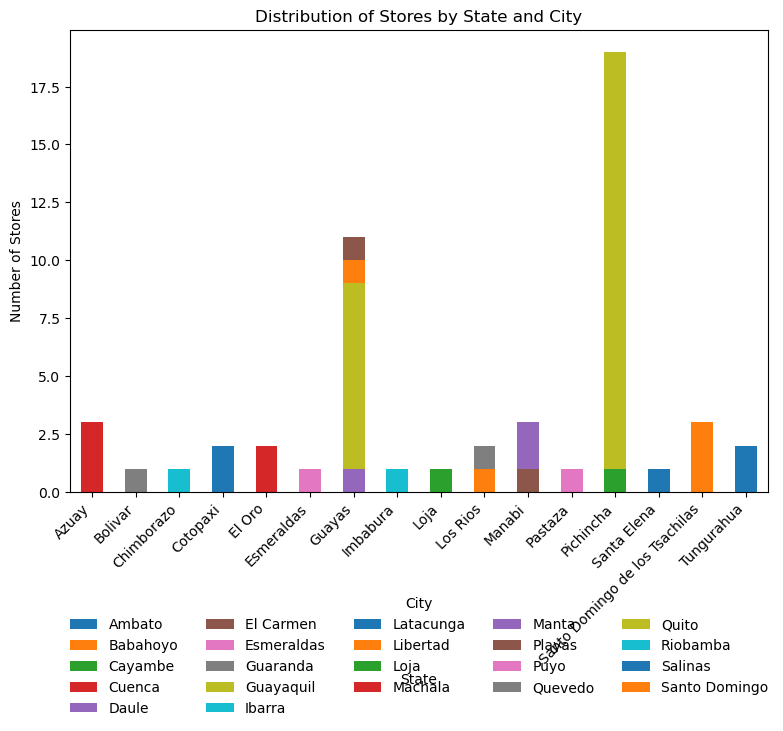

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

city_state_counts.plot(kind="bar", stacked=True, figsize=(9, 6))

plt.xlabel("State")
plt.ylabel("Number of Stores")
plt.title("Distribution of Stores by State and City")
plt.legend(title="City", loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=5, frameon=False)
plt.xticks(rotation=45, ha="right")

plt.show()

Items data


In [23]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [24]:
print('Total items', len(items['item_nbr'].unique()))
print('Total families', len(items['family'].unique()))
print('Total classes', len(items['class'].unique()))


Total items 4100
Total families 33
Total classes 337


In [25]:
# check the data in the training dataset
print('---- training data size of each column----')
print("Total ietms in stores",len(train['item_nbr'].unique()))
print("Total store in the training dataset dataset",len(train['store_nbr'].unique()))
print("Total families in the training dataset ",len(train['family'].unique()))
print("Total cities in the training datase ",len(train['city'].unique()))
print("Total states in the training datase",len(train['state'].unique()))


---- training data size of each column----
Total ietms in stores 4036
Total store in the training dataset dataset 54
Total families in the training dataset  33
Total cities in the training datase  22
Total states in the training datase 16


Distribution of items across the families

[]

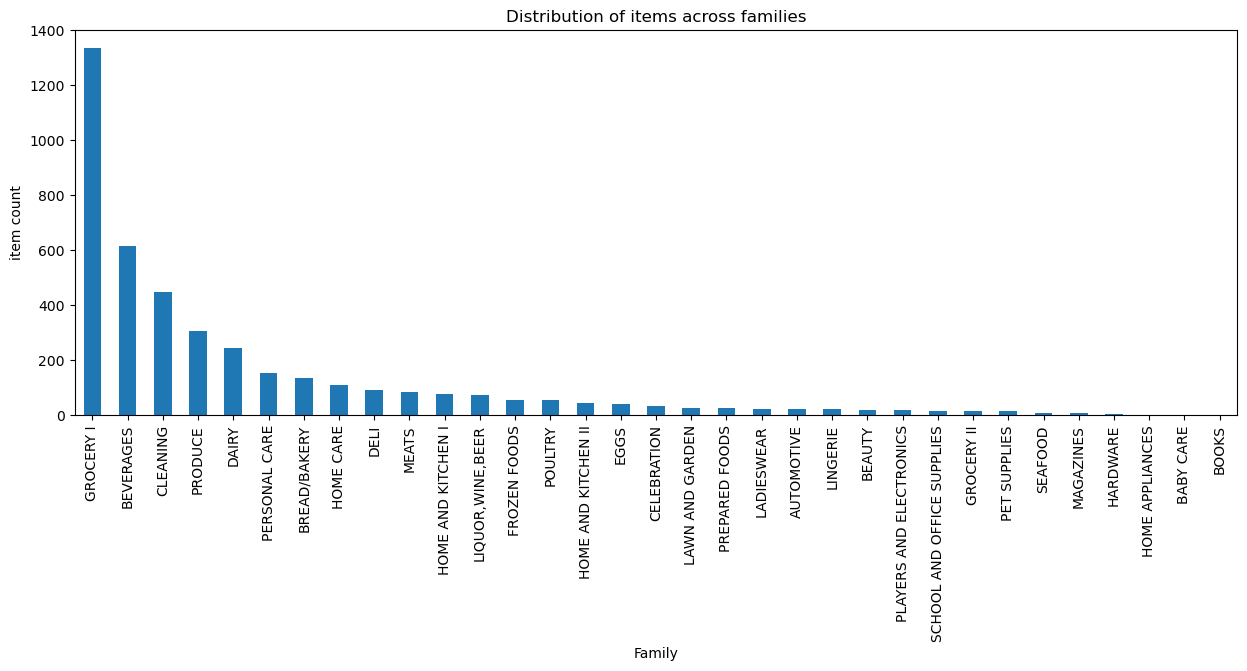

In [26]:
item_distribution = items['family'].value_counts()

plt.figure(figsize=(15,5))
item_distribution.plot(kind='bar',figsize=(15,5))
plt.xlabel('Family')
plt.ylabel('item count')
plt.title('Distribution of items across families')
plt.plot()


Sales analyze

In [27]:
train = train.drop('id',axis=1)

In [28]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,93.14,Salinas,Santa Elena,D,1
1,2013-01-01,25,105574,1.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1
2,2013-01-01,25,105575,2.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1
3,2013-01-01,25,108079,1.0,False,GROCERY I,1030,0,93.14,Salinas,Santa Elena,D,1
4,2013-01-01,25,108701,1.0,False,DELI,2644,1,93.14,Salinas,Santa Elena,D,1


In [29]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day


In [30]:
average_sales = train.groupby("item_nbr")["unit_sales"].mean().reset_index()
average_sales.columns = ["item_nbr", "avg_unit_sales"]

In [31]:
# get the average sales range of items
print("Average sales below 50:",len(average_sales[average_sales['avg_unit_sales'] <= 50]))
print("Average sales between 50 and 100:",len(average_sales[(average_sales['avg_unit_sales'] >= 50) & (average_sales['avg_unit_sales'] <= 100)]))
print("Average sales between 100 and 1000:",len(average_sales[(average_sales['avg_unit_sales'] >= 100) & (average_sales['avg_unit_sales'] <= 1000)]))
print("Average sales grater than 1000:",len(average_sales[average_sales['avg_unit_sales'] >= 1000]))


Average sales below 50: 3989
Average sales between 50 and 100: 40
Average sales between 100 and 1000: 5
Average sales grater than 1000: 2


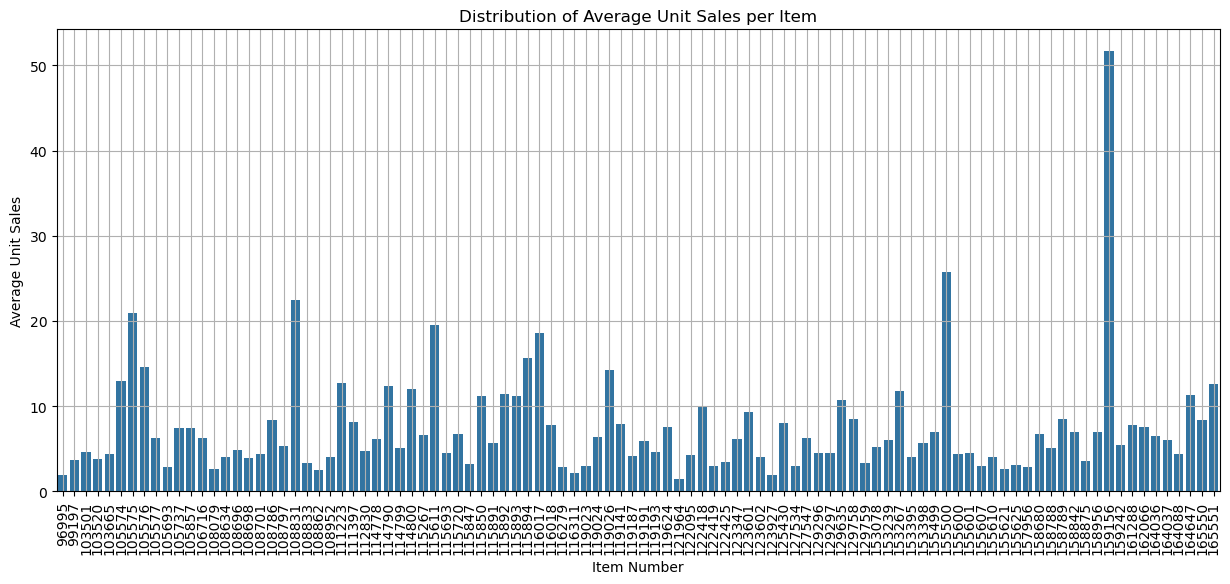

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=average_sales["item_nbr"][:100], y=average_sales["avg_unit_sales"][:100])

plt.xlabel("Item Number")
plt.ylabel("Average Unit Sales")
plt.title("Distribution of Average Unit Sales per Item")
plt.xticks(rotation=90) 
plt.grid(True)

plt.show()


In [33]:
daily_sales = train.groupby(["year", "month","day"])["unit_sales"].sum().reset_index()
daily_sales

,year,month,day,unit_sales
0,2013,1,1,2511.619
1,2013,1,2,496092.418
2,2013,1,3,361429.231
3,2013,1,4,354459.677
4,2013,1,5,477350.121
...,...,...,...,...
1679,2017,8,11,826373.722
1680,2017,8,12,792630.535
1681,2017,8,13,865639.677
1682,2017,8,14,760922.406


In [34]:
daily_sales['date'] = pd.to_datetime(daily_sales[['year','month','day']])

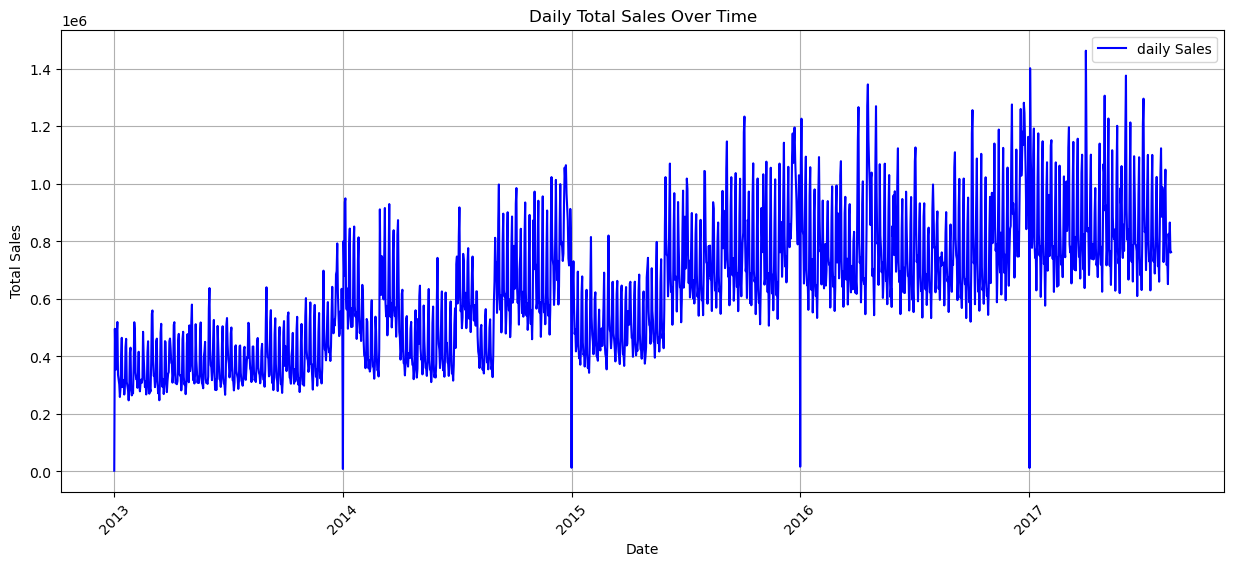

In [35]:

plt.figure(figsize=(15, 6))
plt.plot(daily_sales["date"], daily_sales["unit_sales"], linestyle="-", color="b", label="daily Sales")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Total Sales Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [36]:
monthly_sales = train.groupby(["year", "month"])["unit_sales"].sum().reset_index()

In [37]:
monthly_sales.head()

,year,month,unit_sales
0,2013,1,1.032741e+07
1,2013,2,9.658960e+06
2,2013,3,1.142850e+07
3,2013,4,1.099346e+07
4,2013,5,1.159770e+07


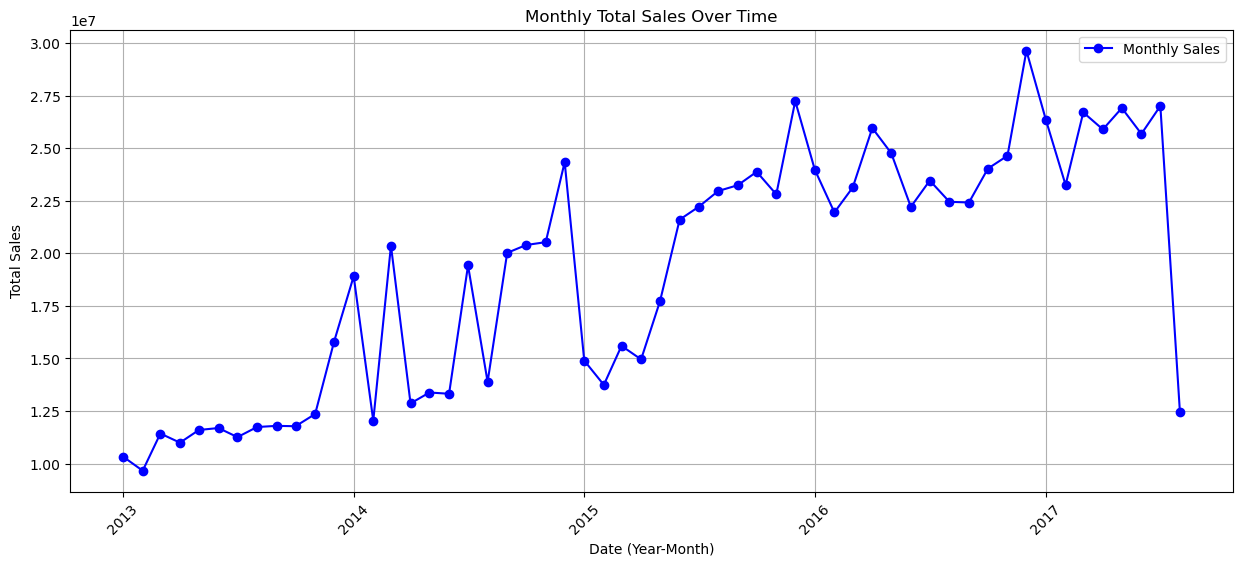

In [38]:

monthly_sales["date"] = pd.to_datetime(monthly_sales[["year", "month"]].assign(day=1))

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales["date"], monthly_sales["unit_sales"], marker="o", linestyle="-", color="b", label="Monthly Sales")

plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Sales")
plt.title("Monthly Total Sales Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

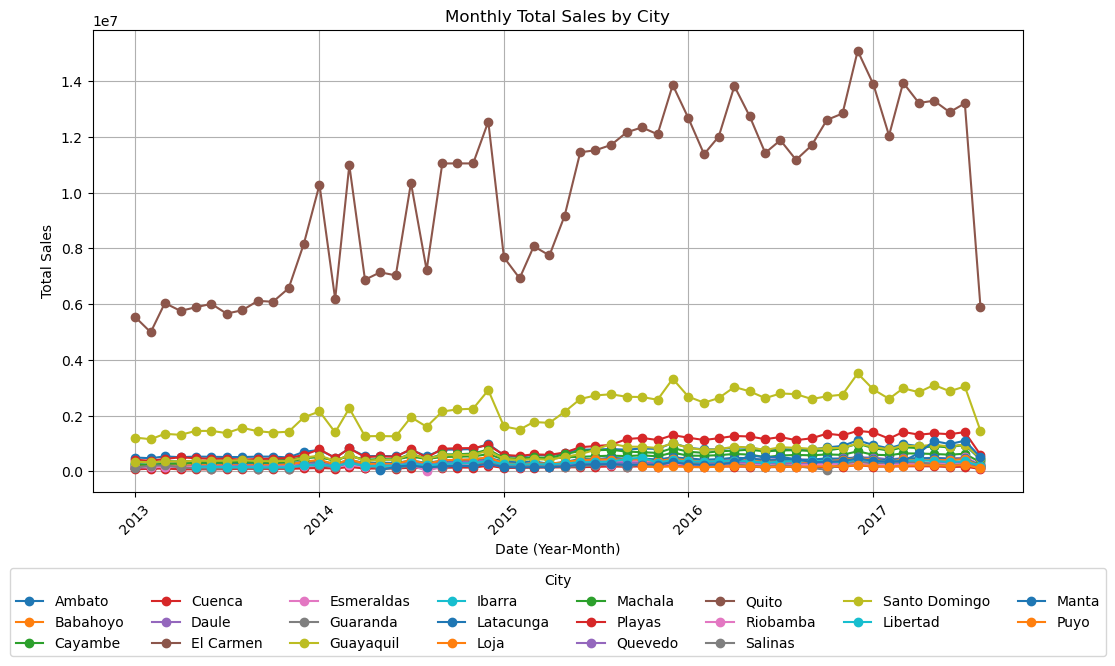

In [39]:
monthly_sales_city = train.groupby(["year", "month", "city"])["unit_sales"].sum().reset_index()
monthly_sales_city["date"] = pd.to_datetime(monthly_sales_city[["year", "month"]].assign(day=1))

#plot the sales
plt.figure(figsize=(12, 6))
for city in monthly_sales_city["city"].unique():
    city_data = monthly_sales_city[monthly_sales_city["city"] == city]
    plt.plot(city_data["date"], city_data["unit_sales"], marker="o", linestyle="-", label=city)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Sales")
plt.title("Monthly Total Sales by City")
plt.xticks(rotation=45)  
plt.legend(title="City",)
plt.legend(title="City",loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(True)
plt.show()


In [40]:
monthly_sales_city

,year,month,city,unit_sales,date
0,2013,1,Ambato,495094.833,2013-01-01
1,2013,1,Babahoyo,162290.092,2013-01-01
2,2013,1,Cayambe,314470.838,2013-01-01
3,2013,1,Cuenca,415846.472,2013-01-01
4,2013,1,Daule,161554.362,2013-01-01
...,...,...,...,...,...
1173,2017,8,Quevedo,154635.191,2017-08-01
1174,2017,8,Quito,5882149.252,2017-08-01
1175,2017,8,Riobamba,126226.527,2017-08-01
1176,2017,8,Salinas,147469.864,2017-08-01


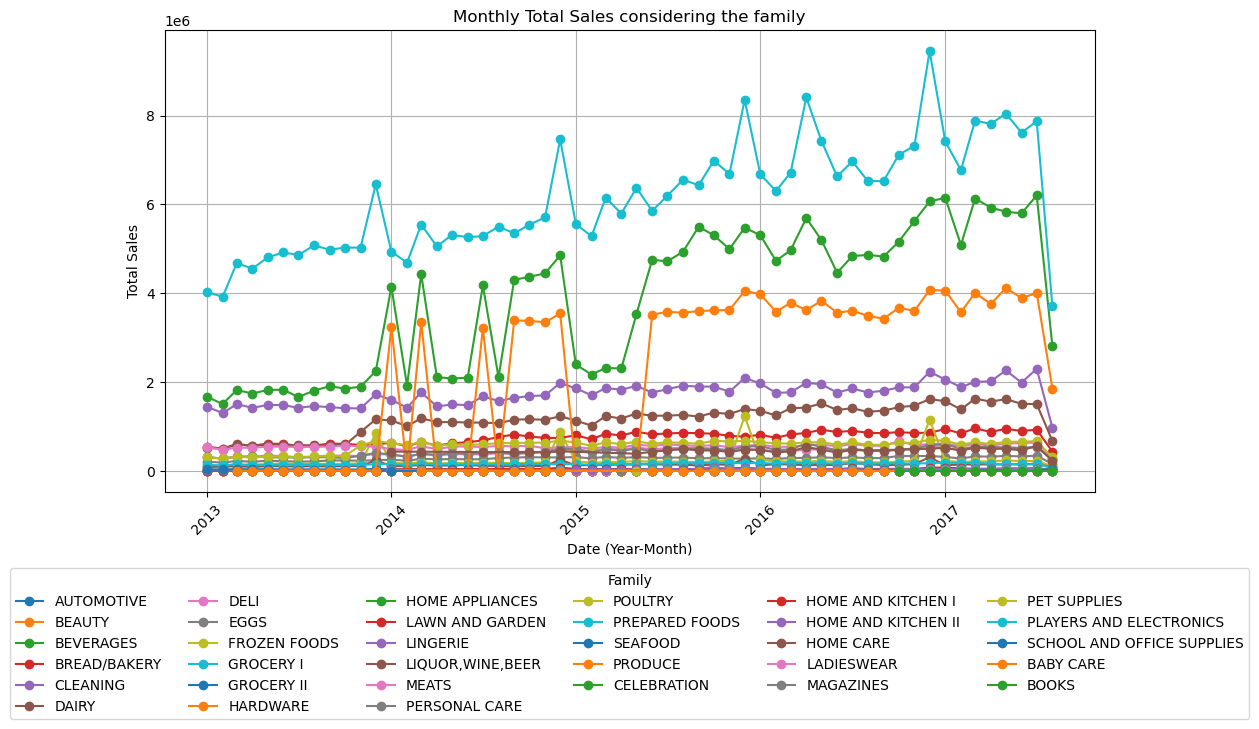

In [41]:
monthly_sales_family = train.groupby(["year", "month", "family"])["unit_sales"].sum().reset_index()
monthly_sales_family["date"] = pd.to_datetime(monthly_sales_family[["year", "month"]].assign(day=1))

#plot the sales
plt.figure(figsize=(12, 6))
for family in monthly_sales_family["family"].unique():
    family_data = monthly_sales_family[monthly_sales_family["family"] == family]
    plt.plot(family_data["date"], family_data["unit_sales"], marker="o", linestyle="-", label=family)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Sales")
plt.title("Monthly Total Sales considering the family")
plt.xticks(rotation=45)  
plt.legend(title="Family",loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6)
plt.grid(True)
plt.show()

In [42]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,93.14,Salinas,Santa Elena,D,1,2013,1,1
1,2013-01-01,25,105574,1.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
2,2013-01-01,25,105575,2.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
3,2013-01-01,25,108079,1.0,False,GROCERY I,1030,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
4,2013-01-01,25,108701,1.0,False,DELI,2644,1,93.14,Salinas,Santa Elena,D,1,2013,1,1


In [43]:
train['city'].value_counts()

city
Quito            51982641
Guayaquil        16710676
Cuenca            6931410
Santo Domingo     5860145
Ambato            5558263
Machala           4606718
Latacunga         3573311
Loja              2727731
Daule             2631714
Cayambe           2568282
Babahoyo          2361724
Manta             2228836
Libertad          2211162
Salinas           2057020
Quevedo           1963485
Esmeraldas        1939694
Ibarra            1938678
Guaranda          1879155
Riobamba          1805941
El Carmen         1648867
Playas            1388104
Puyo               923483
Name: count, dtype: int64

In [44]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,93.14,Salinas,Santa Elena,D,1,2013,1,1
1,2013-01-01,25,105574,1.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
2,2013-01-01,25,105575,2.0,False,GROCERY I,1045,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
3,2013-01-01,25,108079,1.0,False,GROCERY I,1030,0,93.14,Salinas,Santa Elena,D,1,2013,1,1
4,2013-01-01,25,108701,1.0,False,DELI,2644,1,93.14,Salinas,Santa Elena,D,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,47.57,El Carmen,Manabi,C,3,2017,8,15
125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,47.57,El Carmen,Manabi,C,3,2017,8,15
125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,47.57,El Carmen,Manabi,C,3,2017,8,15
125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,47.57,El Carmen,Manabi,C,3,2017,8,15


In [45]:
from sklearn.preprocessing import LabelEncoder
#one hot encode for onpromotion ( Flase -> 0 and True -> 1)
train["onpromotion"] = train["onpromotion"].astype(int)

#label encoding for city, state,family, and type
label_encoders = {}
categorical_cols = ["city", "state", "family", "type"]

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])  
    label_encoders[col] = le

In [46]:
for col in categorical_cols:
    print(f"Label encoding for '{col}':")
    print(dict(enumerate(label_encoders[col].classes_)))

Label encoding for 'city':
{0: 'Ambato', 1: 'Babahoyo', 2: 'Cayambe', 3: 'Cuenca', 4: 'Daule', 5: 'El Carmen', 6: 'Esmeraldas', 7: 'Guaranda', 8: 'Guayaquil', 9: 'Ibarra', 10: 'Latacunga', 11: 'Libertad', 12: 'Loja', 13: 'Machala', 14: 'Manta', 15: 'Playas', 16: 'Puyo', 17: 'Quevedo', 18: 'Quito', 19: 'Riobamba', 20: 'Salinas', 21: 'Santo Domingo'}
Label encoding for 'state':
{0: 'Azuay', 1: 'Bolivar', 2: 'Chimborazo', 3: 'Cotopaxi', 4: 'El Oro', 5: 'Esmeraldas', 6: 'Guayas', 7: 'Imbabura', 8: 'Loja', 9: 'Los Rios', 10: 'Manabi', 11: 'Pastaza', 12: 'Pichincha', 13: 'Santa Elena', 14: 'Santo Domingo de los Tsachilas', 15: 'Tungurahua'}
Label encoding for 'family':
{0: 'AUTOMOTIVE', 1: 'BABY CARE', 2: 'BEAUTY', 3: 'BEVERAGES', 4: 'BOOKS', 5: 'BREAD/BAKERY', 6: 'CELEBRATION', 7: 'CLEANING', 8: 'DAIRY', 9: 'DELI', 10: 'EGGS', 11: 'FROZEN FOODS', 12: 'GROCERY I', 13: 'GROCERY II', 14: 'HARDWARE', 15: 'HOME AND KITCHEN I', 16: 'HOME AND KITCHEN II', 17: 'HOME APPLIANCES', 18: 'HOME CARE', 19

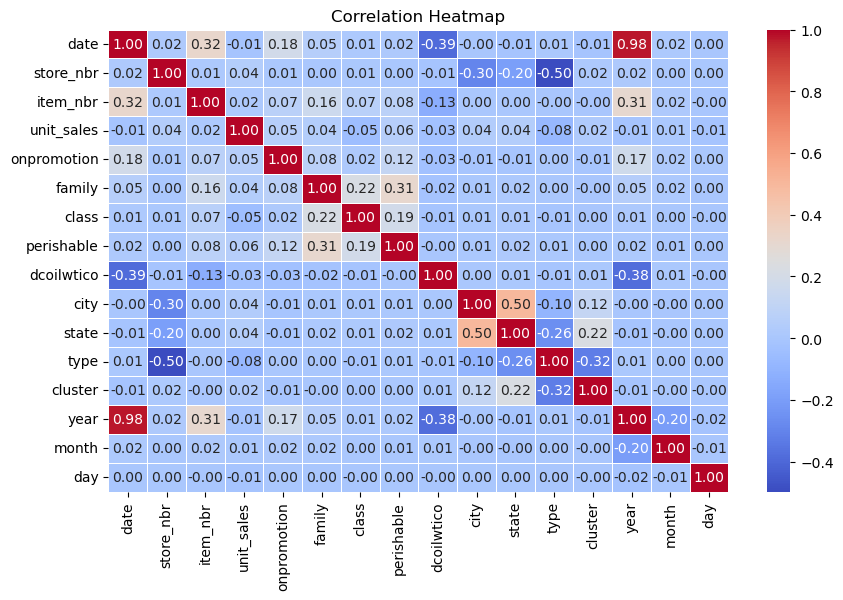

In [47]:
import seaborn as sns
correlation = train.corr()

plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [48]:
train


,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day
0,2013-01-01,25,103665,7.0,0,5,2712,1,93.14,20,13,3,1,2013,1,1
1,2013-01-01,25,105574,1.0,0,12,1045,0,93.14,20,13,3,1,2013,1,1
2,2013-01-01,25,105575,2.0,0,12,1045,0,93.14,20,13,3,1,2013,1,1
3,2013-01-01,25,108079,1.0,0,12,1030,0,93.14,20,13,3,1,2013,1,1
4,2013-01-01,25,108701,1.0,0,9,2644,1,93.14,20,13,3,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125497035,2017-08-15,54,2089339,4.0,0,12,1006,0,47.57,5,10,2,3,2017,8,15
125497036,2017-08-15,54,2106464,1.0,1,3,1148,0,47.57,5,10,2,3,2017,8,15
125497037,2017-08-15,54,2110456,192.0,0,3,1120,0,47.57,5,10,2,3,2017,8,15
125497038,2017-08-15,54,2113914,198.0,1,7,3040,0,47.57,5,10,2,3,2017,8,15


In [49]:
train.set_index('date',inplace=True)

In [50]:
chosen_df = train[train.index >= '2015-12-23']

In [51]:
chosen_df = chosen_df[chosen_df['city']=='Quito']

In [52]:
chosen_df

,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day
date,,,,,,,,,,,,,,,


In [53]:
from sklearn.preprocessing import LabelEncoder
#one hot encode for onpromotion ( Flase -> 0 and True -> 1)
chosen_df["onpromotion"] = chosen_df["onpromotion"].astype(int)

#label encoding for city, state,family, and type
label_encoders = {}
categorical_cols = ["city", "state", "family", "type"]

for col in categorical_cols:
    le = LabelEncoder()
    chosen_df[col] = le.fit_transform(chosen_df[col])  
    label_encoders[col] = le

In [54]:
for col in categorical_cols:
    print(f"Label encoding for '{col}':")
    print(dict(enumerate(label_encoders[col].classes_)))

Label encoding for 'city':
{}
Label encoding for 'state':
{}
Label encoding for 'family':
{}
Label encoding for 'type':
{}


In [55]:
chosen_df = chosen_df[chosen_df['family']==12]

In [56]:
choosen_items = chosen_df['item_nbr'].value_counts()[:20].index.to_list()

In [57]:
chosen_df = chosen_df[chosen_df['item_nbr'].isin(choosen_items)]

In [58]:
# choosen_df.to_csv('choosen_df.csv')